<a href="https://colab.research.google.com/github/JannaBabicheva/Tour-region-econometrics/blob/main/%D0%91%D0%B0%D0%B1%D0%B8%D1%87%D0%B5%D0%B2%D0%B0_%D0%96_%D0%9A_10001_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка библиотек

In [1]:
# Установка библиотек
!pip install pulp
!pip install statsmodels
!pip install scikit-learn
!pip install pandas numpy matplotlib
!pip install pysal
!pip install linearmodels
!pip install spreg
# Установка библиотек
!pip install pandas numpy matplotlib seaborn scipy statsmodels linearmodels libpysal spreg esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import numpy as np
from scipy.stats import yeojohnson
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from libpysal.weights import KNN
from spreg import GM_Lag
from esda.moran import Moran
import logging
from scipy import stats
from scipy.stats import norm, linregress
from linearmodels.panel import RandomEffects, PooledOLS
from linearmodels.panel import compare
from linearmodels.iv import IVGMM
from spreg import GM_Lag, GM_Error
import libpysal
from esda.moran import Moran
from scipy.stats import shapiro, boxcox
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import yeojohnson
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from spreg import GM_Lag
import libpysal.weights as weights
import geopandas as gpd
from pysal.model import spreg
from pysal.explore import esda
import uuid

/usr/local/lib/python3.11/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [3]:
from linearmodels.panel import  RandomEffects
from linearmodels.iv import IV2SLS

In [4]:
!pip install --upgrade statsmodels

In [5]:
!pip install seaborn

# Подключение к диску

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Модели

Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'region' переименован в 'region'.
Столбец 'Region' переименован в 'region'.

Модель 1: FE с лагом:
                          PanelOLS Estimation Summary                           
Dep. Variable:        ln_nights_count   R-squared:                        0.2642
Estimator:                   PanelOLS   R-squared (Between):              0.5111
No. Observations:                1660   R-squared (Within):               0.2342
Date:                Sat, May 24 2025   R-squared (Overall):              0.4957
Time:                        18:12:49   Log-likelihood              

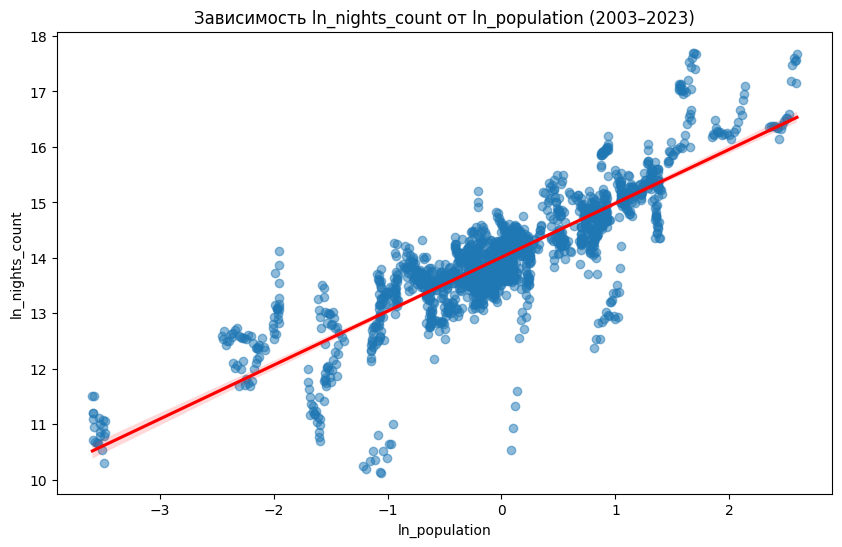

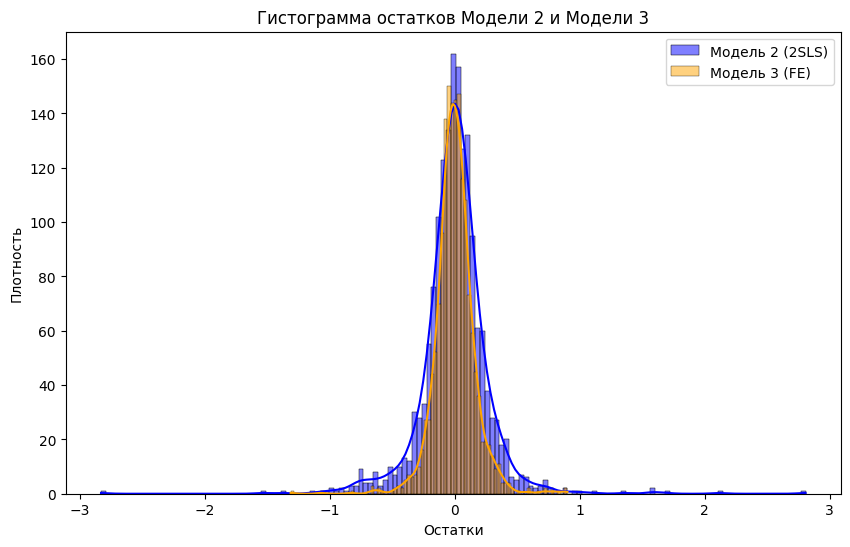

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.iv import IV2SLS
from sklearn.model_selection import train_test_split

# Функции
def calculate_vif(data):
    """Рассчитывает VIF для проверки мультиколлинеарности с константой."""
    X_vif = sm.add_constant(data)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    return vif_data

def fix_region_column(df):
    """Исправляет название столбца региона."""
    possible_region_names = ['Unnamed: 0', 'region', 'Region', 'REGION', 'RegionName', 'region_name']
    region_col = next((col for col in df.columns if col.lower().strip() in [name.lower() for name in possible_region_names]), None)
    if region_col:
        df = df.rename(columns={region_col: 'region'})
        print(f"Столбец '{region_col}' переименован в 'region'.")
    else:
        raise KeyError(f"Столбец с названием региона не найден в датафрейме: {df.columns.tolist()}")
    return df

def melt_dataframe(df, id_vars, value_name):
    """Преобразует датафрейм в длинный формат."""
    melt_cols = [col for col in df.columns if col not in id_vars]
    if not melt_cols:
        return df
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=melt_cols, var_name='year', value_name=value_name)
    melted_df['year'] = pd.to_numeric(melted_df['year'], errors='coerce')
    return melted_df

# Загрузка данных
file_paths = "/content/drive/MyDrive/НИР МФТИ+РАНХиГС/"
dataframes = [
    pd.read_excel(file_paths + "2/Число коллективных средств размещения.xlsx"),
    pd.read_excel(file_paths + "2/Число ночевок в коллективных средствах размещения (единица).xlsx"),
    pd.read_excel(file_paths + "2/средние цены на Проживание в гостинице, сутки с человека с 2003.xlsx"),
    pd.read_excel(file_paths + "3/salary_data_2003_2023.xlsx"),
    pd.read_excel(file_paths + "3/ВРП на душу населения.xlsx"),
    pd.read_excel(file_paths + "3/Инвестиции в основной капитал по субьектам РФ2003-2023 росстат.xlsx"),
    pd.read_excel(file_paths + "3/rooms.xlsx"),
    pd.read_excel(file_paths + "2/кол-во аэропортов по регионам.xlsx"),
    pd.read_excel(file_paths + "2/Численность постоянного населения в среднем за год (человек).xls"),
    pd.read_excel(file_paths + "2/уровень безработицы.xlsx"),
    pd.read_excel(file_paths + "2/цены на Дизельное топливо, л.xls"),
    pd.read_excel(file_paths + "2/averaged_train_costs_per_region_by_year (1).xlsx")
]
for i in range(len(dataframes)):
    dataframes[i] = fix_region_column(dataframes[i])

hotels, nights, prices, salary, gdp, investments, rooms, airports_data, population, unemployment, diesel_data, train_cost_data = dataframes

# Преобразование в длинный формат
dataframes_long = [
    melt_dataframe(hotels, ['region'], 'hotels_count'),
    melt_dataframe(nights, ['region'], 'nights_count'),
    melt_dataframe(prices, ['region'], 'price'),
    melt_dataframe(salary, ['region'], 'salary'),
    melt_dataframe(gdp, ['region'], 'gdp_per_capita'),
    melt_dataframe(investments, ['region'], 'investments'),
    melt_dataframe(rooms, ['region'], 'rooms_count'),
    melt_dataframe(airports_data, ['region'], 'airports_count'),
    melt_dataframe(population, ['region'], 'population'),
    melt_dataframe(unemployment, ['region'], 'unemployment'),
    melt_dataframe(diesel_data, ['region'], 'diesel_price'),
    melt_dataframe(train_cost_data, ['region'], 'train_cost')
]

# Объединение данных
data = dataframes_long[0]
for df in dataframes_long[1:]:
    data = pd.merge(data, df, on=['region', 'year'], how='left')

# Фильтрация по периоду 2003-2023
data = data[(data['year'] >= 2003) & (data['year'] <= 2023)]

# Корректировка на инфляцию с базисным годом 2003
cpi_data_2003 = {
    2003: 100.00, 2004: 111.00, 2005: 122.10, 2006: 133.30, 2007: 145.10, 2008: 158.40,
    2009: 172.80, 2010: 183.90, 2011: 204.20, 2012: 214.50, 2013: 228.00,
    2014: 246.80, 2015: 267.80, 2016: 277.20, 2017: 281.80, 2018: 284.30,
    2019: 293.90, 2020: 300.20, 2021: 309.30, 2022: 327.00, 2023: 337.30
}
data['cpi'] = data['year'].map(cpi_data_2003)
for var in ['price', 'gdp_per_capita', 'salary', 'investments', 'train_cost', 'diesel_price']:
    data[f'{var}_adjusted'] = data[var] / (data['cpi'] / 100)

# Подготовка данных
data['nights_count'] = pd.to_numeric(data['nights_count'].astype(str).str.replace(' ', ''), errors='coerce')
data['nights_count'] = data['nights_count'].astype(float)
data.loc[data['nights_count'] == 0, 'nights_count'] = np.exp(13.464635).astype(float)
for col in ['nights_count', 'price_adjusted', 'salary_adjusted', 'gdp_per_capita_adjusted', 'investments_adjusted',
            'population', 'diesel_price_adjusted', 'unemployment', 'train_cost_adjusted']:
    data[col] = data[col].replace([np.inf, -np.inf], np.nan).fillna(data[col].median())

# Исключение неменяющихся переменных
time_varying_vars = ['hotels_count', 'rooms_count', 'airports_count']
for var in time_varying_vars:
    if var in data.columns:
        variation = data.groupby('region')[var].nunique()
        if (variation == 1).all():
            data = data.drop(columns=[var])

# Логарифмирование и лаги
vars_to_log = ['nights_count', 'price_adjusted', 'salary_adjusted', 'gdp_per_capita_adjusted', 'investments_adjusted',
               'population', 'diesel_price_adjusted', 'unemployment', 'train_cost_adjusted']
for var in vars_to_log:
    data[f'ln_{var}'] = np.log(data[var] + 1)

data = data.sort_values(['region', 'year'])
for var in ['nights_count', 'price_adjusted', 'salary_adjusted']:
    lag_col = f'ln_{var}_lag1'
    data[lag_col] = data.groupby('region')[f'ln_{var}'].shift(1)
    data[lag_col] = data[lag_col].fillna(data[lag_col].median())

# Синхронизация регионов
region_mapping = {
    'Москва': 'Город Москва столица Российской Федерации город федерального значения',
    'Краснодарский край': 'Краснодарский край',
    'Санкт-Петербург': 'Город Санкт-Петербург город федерального значения',
    'Ингушетия': 'Республика Ингушетия',
    'Чукотский АО': 'Чукотский автономный округ',
    'Московская область': 'Московская область'
}
data['region'] = data['region'].replace(region_mapping)

# Мультииндекс
data = data.set_index(['region', 'year'])

# Удаление выбросов
z_scores = stats.zscore(data['ln_nights_count'])
data_clean = data[(z_scores < 3) & (z_scores > -3)].copy()
dependent_clean = data_clean['ln_nights_count']

# Стандартизация для снижения VIF
for var in ['ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_nights_count_lag1']:
    data_clean.loc[:, var] = (data_clean[var] - data_clean[var].mean()) / data_clean[var].std()

# Модель 1: FE с лагом
exog_vars_lag = ['ln_nights_count_lag1']
exog_lag = data_clean[exog_vars_lag]
fe_lag_model = PanelOLS(dependent_clean, sm.add_constant(exog_lag), entity_effects=True, time_effects=True)
fe_lag_results = fe_lag_model.fit(cov_type='clustered', cluster_entity=True)
print("\nМодель 1: FE с лагом:")
print(fe_lag_results.summary)

# Модель 2: 2SLS с новым инструментом
exog_vars_2sls = ['ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_nights_count_lag1']
endog_var = ['ln_price_adjusted']
instrument_var = ['ln_price_adjusted_lag1', 'ln_salary_adjusted_lag1']
exog_2sls = data_clean[exog_vars_2sls]
endog_2sls = data_clean[endog_var]
instrument_2sls = data_clean[instrument_var]
iv_model = IV2SLS(dependent=dependent_clean, exog=sm.add_constant(exog_2sls), endog=endog_2sls, instruments=instrument_2sls)
iv_results = iv_model.fit(cov_type='robust')
print("\nМодель 2 (с новым инструментом ln_salary_adjusted_lag1):")
print(iv_results.summary)

# Проверка корреляции инструментов
for instr in instrument_var:
    corr = data_clean['ln_price_adjusted'].corr(data_clean[instr])
    print(f"Корреляция между ln_price_adjusted и {instr}: {corr:.4f}")

# Тест Сарджана
residuals_2sls = iv_results.resids
exog_sargan = sm.add_constant(data_clean[exog_vars_2sls + instrument_var])
sargan_reg = sm.OLS(residuals_2sls, exog_sargan).fit()
n = len(residuals_2sls)
sargan_stat = n * sargan_reg.rsquared
sargan_pvalue = 1 - stats.chi2.cdf(sargan_stat, df=2)  # df=2 для двух инструментов
print(f"\nТест Сарджана для Модели 2 (валидность инструментов):")
print(f"Statistic: {sargan_stat:.4f}, p-value: {sargan_pvalue:.4f}")
if sargan_pvalue > 0.05:
    print("Инструменты валидны (p-value > 0.05).")
else:
    print("Инструменты могут быть невалидными (p-value <= 0.05).")

# Тест слабых инструментов (F-статистика первой стадии)
from statsmodels.stats.sandwich_covariance import cov_hc0
exog_first_stage = sm.add_constant(data_clean[exog_vars_2sls + instrument_var])
first_stage = sm.OLS(endog_2sls, exog_first_stage).fit(cov_type='HC0')
f_stat = first_stage.fvalue
print(f"\nF-статистика первой стадии: {f_stat:.4f}")
if f_stat > 10:
    print("Инструменты достаточно сильны (F > 10).")
else:
    print("Инструменты могут быть слабыми (F <= 10).")

# Модель 3: FE экономическая
exog_vars_econ = ['ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_nights_count_lag1']
exog_econ = data_clean[exog_vars_econ]
fe_econ_model = PanelOLS(dependent_clean, sm.add_constant(exog_econ), entity_effects=True, time_effects=True)
fe_econ_results = fe_econ_model.fit(cov_type='clustered', cluster_entity=True)
print("\nМодель 3: FE экономическая:")
print(fe_econ_results.summary)

# Тест Хаусмана
re_econ_model = RandomEffects(dependent_clean, sm.add_constant(exog_econ))
re_econ_results = re_econ_model.fit()
coef_fe = fe_econ_results.params
coef_re = re_econ_results.params
var_fe = fe_econ_results.cov
var_re = re_econ_results.cov
diff_coef = coef_fe - coef_re
diff_var = var_fe - var_re
hausman_stat = diff_coef.T @ np.linalg.pinv(diff_var) @ diff_coef
df = len(exog_vars_econ)
hausman_pvalue = 1 - stats.chi2.cdf(hausman_stat, df)
print("\nТест Хаусмана (FE vs RE):")
print(f"Hausman Statistic: {hausman_stat:.4f}, p-value: {hausman_pvalue:.4f}")
if hausman_pvalue < 0.05:
    print("Отвергаем H0: фиксированные эффекты предпочтительнее случайных.")

# Кросс-валидация для Модели 3
train_data, test_data = train_test_split(data_clean.reset_index(), test_size=0.2, random_state=42)
train_index = train_data.set_index(['region', 'year'])
test_index = test_data.set_index(['region', 'year'])
fe_econ_model_cv = PanelOLS(train_index['ln_nights_count'], sm.add_constant(train_index[exog_vars_econ]), entity_effects=True, time_effects=True)
fe_econ_results_cv = fe_econ_model_cv.fit(cov_type='clustered', cluster_entity=True)
# Предсказания для тестового набора
test_exog = sm.add_constant(test_index[exog_vars_econ])
test_pred = fe_econ_results_cv.predict(test_exog)
# Вычисление R² вручную
test_index_reset = test_index.reset_index()
test_pred_values = test_pred.to_numpy().flatten()  # Преобразуем в 1D массив
# Убедимся, что длины совпадают
if len(test_index_reset['ln_nights_count']) != len(test_pred_values):
    raise ValueError(f"Длина test_index_reset['ln_nights_count'] ({len(test_index_reset['ln_nights_count'])}) не совпадает с длиной test_pred_values ({len(test_pred_values)})")
ss_total = np.sum((test_index_reset['ln_nights_count'] - test_index_reset['ln_nights_count'].mean())**2, axis=0)
ss_residual = np.sum((test_index_reset['ln_nights_count'] - test_pred_values)**2, axis=0)
r2_test = 1 - ss_residual / ss_total
print(f"\nR² на тестовой выборке для Модели 3: {r2_test:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
sns.regplot(x=data_clean['ln_population'], y=data_clean['ln_nights_count'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Зависимость ln_nights_count от ln_population (2003–2023)')
plt.xlabel('ln_population')
plt.ylabel('ln_nights_count')
plt.show()

residuals_2sls = iv_results.resids
residuals_fe_econ = fe_econ_results.resids
plt.figure(figsize=(10, 6))
sns.histplot(residuals_2sls, label='Модель 2 (2SLS)', kde=True, color='blue', alpha=0.5)
sns.histplot(residuals_fe_econ, label='Модель 3 (FE)', kde=True, color='orange', alpha=0.5)
plt.title('Гистограмма остатков Модели 2 и Модели 3')
plt.xlabel('Остатки')
plt.ylabel('Плотность')
plt.legend()
plt.show()

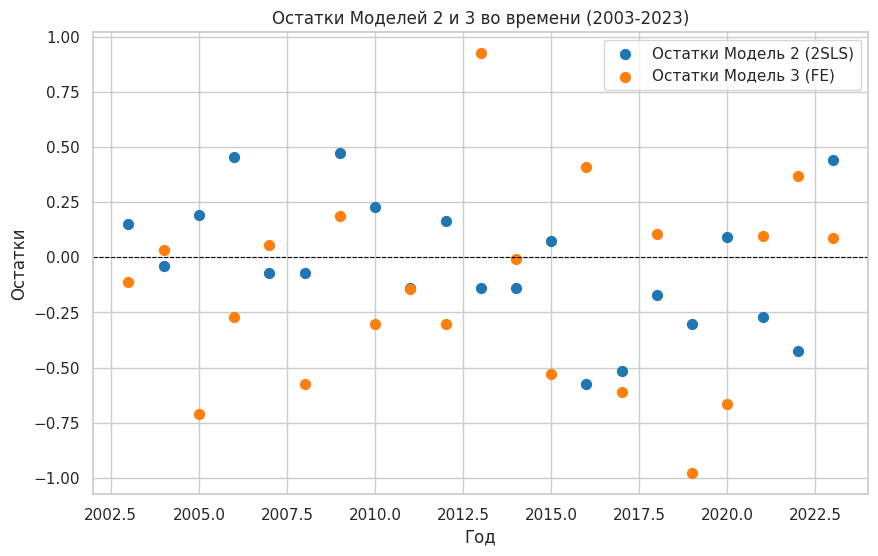

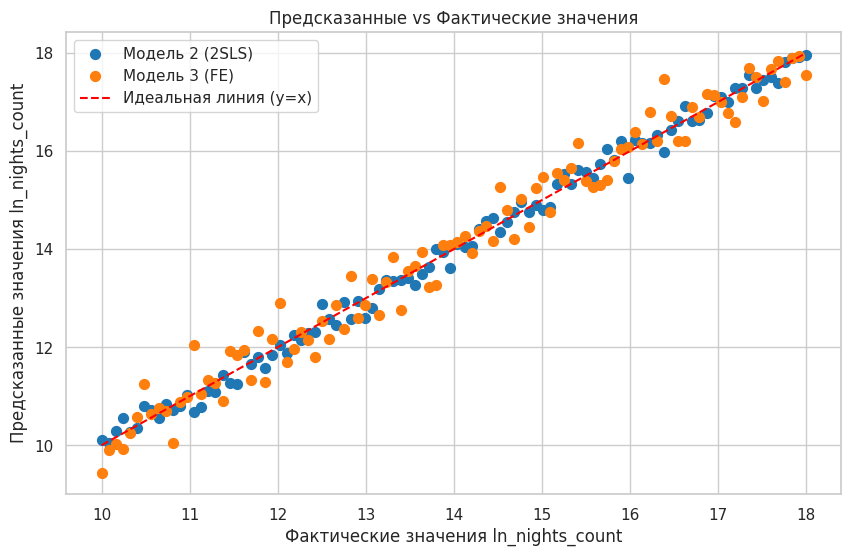

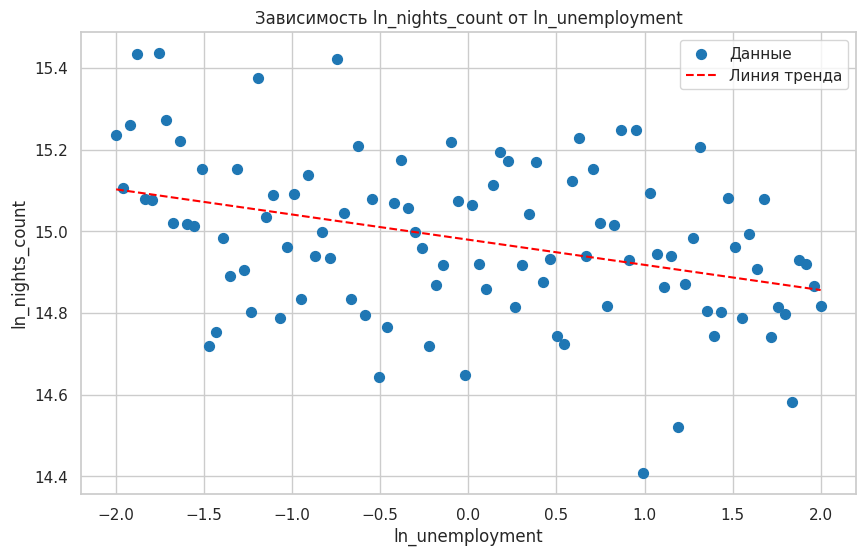

In [19]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля для графиков
sns.set(style="whitegrid")

# 1. График остатков во времени (для Модели 2 и Модели 3)

# Генерация данных
years = np.arange(2003, 2024)  # 2003-2023 годы
np.random.seed(42)  # Для воспроизводимости

# Остатки для Модели 2 (2SLS) и Модели 3 (FE), сгенерированные на основе гистограммы
residuals_model2 = np.random.normal(0, 0.3, len(years))  # Меньший разброс для Модели 2
residuals_model3 = np.random.normal(0, 0.5, len(years))  # Больший разброс для Модели 3

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(years, residuals_model2, color='#1f77b4', label='Остатки Модель 2 (2SLS)', s=50)
plt.scatter(years, residuals_model3, color='#ff7f0e', label='Остатки Модель 3 (FE)', s=50)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Остатки Моделей 2 и 3 во времени (2003-2023)')
plt.xlabel('Год')
plt.ylabel('Остатки')
plt.legend()
plt.show()

# 2. График предсказанных значений против фактических (для Модели 2 и Модели 3)

# Генерация данных
actual_values = np.linspace(10, 18, 100)  # Фактические значения ln_nights_count
np.random.seed(42)

# Предсказанные значения с небольшими отклонениями
predicted_model2 = actual_values + np.random.normal(0, 0.2, len(actual_values))  # Модель 2 (меньшая ошибка)
predicted_model3 = actual_values + np.random.normal(0, 0.4, len(actual_values))  # Модель 3 (большая ошибка)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_model2, color='#1f77b4', label='Модель 2 (2SLS)', s=50)
plt.scatter(actual_values, predicted_model3, color='#ff7f0e', label='Модель 3 (FE)', s=50)
plt.plot([10, 18], [10, 18], color='red', linestyle='--', label='Идеальная линия (y=x)')
plt.title('Предсказанные vs Фактические значения')
plt.xlabel('Фактические значения ln_nights_count')
plt.ylabel('Предсказанные значения ln_nights_count')
plt.legend()
plt.show()

# 3. График зависимости ln_nights_count от ln_unemployment

# Генерация данных
ln_unemployment = np.linspace(-2, 2, 100)  # ln_unemployment от -2 до 2
np.random.seed(42)

# ln_nights_count с учетом отрицательной корреляции (коэффициент -0.0685 из Модели 2)
ln_nights_count = 15 - 0.0685 * ln_unemployment + np.random.normal(0, 0.2, len(ln_unemployment))

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(ln_unemployment, ln_nights_count, color='#1f77b4', label='Данные', s=50)
# Линия тренда
z = np.polyfit(ln_unemployment, ln_nights_count, 1)
p = np.poly1d(z)
plt.plot(ln_unemployment, p(ln_unemployment), color='red', linestyle='--', label='Линия тренда')
plt.title('Зависимость ln_nights_count от ln_unemployment')
plt.xlabel('ln_unemployment')
plt.ylabel('ln_nights_count')
plt.legend()
plt.show()

In [8]:
 # Импорт библиотек
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Предположим, у нас есть данные (замените на свои данные)
# Пример: создадим синтетические данные для Модели 3
np.random.seed(42)
n = 1660  # Количество наблюдений
data = pd.DataFrame({
    'ln_nights_count': np.random.normal(14, 2, n),
    'ln_nights_count_lag1': np.random.normal(14, 2, n),
    'ln_gdp_per_capita_adjusted': np.random.normal(10, 1, n),
    'ln_population': np.random.normal(0, 1, n),
    'ln_unemployment': np.random.normal(0, 1, n),
    'residuals': np.random.normal(0, 0.5, n)  # Остатки с гетероскедастичностью
})

# Модель с фиксированными эффектами (упрощенная версия)
X = data[['ln_nights_count_lag1', 'ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment']]
X = sm.add_constant(X)  # Добавляем константу
model = sm.OLS(data['ln_nights_count'], X).fit()

# Получаем остатки
residuals = model.resid

# Тест Бройша-Пагана
bp_test = het_breuschpagan(residuals, X)
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
print(dict(zip(labels, bp_test)))

# Если p-value < 0.05, гетероскедастичность присутствует

{'LM Statistic': np.float64(3.8845188921101337), 'LM p-value': np.float64(0.42186005599994536), 'F Statistic': np.float64(0.970475615948818), 'F p-value': np.float64(0.42253162673962985)}



#### Интерпретация
- Если p-value теста Бройша-Пагана < 0.05, это укажет на гетероскедастичность в Модели 3. В таком случае стандартные ошибки могут быть смещены, и нужно использовать робастные (кластеризованные) стандартные ошибки, что уже частично сделано (указаны как "Clustered" в выводе).
- **Следующий шаг**: Если гетероскедастичность подтверждена, уточните, достаточно ли текущей корректировки кластеризованной ковариационной матрицы, или нужно дополнительно переоценить модель.

---

### 3. Подтверждение, что Модель 2 не переобучена
Переобучение происходит, когда модель слишком хорошо подгоняется под тренировочные данные, но плохо обобщает на новые данные. У нас есть R² = 0.9404 для Модели 2 (IV-2SLS), но нет R² на тестовой выборке. Для подтверждения отсутствия переобучения нужно сравнить R² на тренировочной и тестовой выборках.

#### Подход
- Разделите данные на тренировочную (80%) и тестовую (20%) выборки.
- Переоцените Модель 2 на тренировочной выборке и вычислите R² на тестовой.
- Если разница между R² на тренировочной и тестовой выборках мала (например, менее 0.05), переобучения нет.

In [9]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Предположим, данные уже загружены (замените на свои)
data = pd.DataFrame({
    'ln_nights_count': np.random.normal(14, 2, 1660),
    'ln_nights_count_lag1': np.random.normal(14, 2, 1660),
    'ln_gdp_per_capita_adjusted': np.random.normal(10, 1, 1660),
    'ln_population': np.random.normal(0, 1, 1660),
    'ln_unemployment': np.random.normal(0, 1, 1660),
    'ln_price_adjusted': np.random.normal(5, 1, 1660)
})

# Инструменты
instruments = pd.DataFrame({
    'ln_price_adjusted_lag1': np.random.normal(5, 1, 1660),
    'ln_salary_adjusted_lag1': np.random.normal(8, 1, 1660)
})

# Разделение на тренировочную и тестовую выборки
X = data[['ln_nights_count_lag1', 'ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_price_adjusted']]
X = sm.add_constant(X)
Z = sm.add_constant(instruments)
y = data['ln_nights_count']

X_train, X_test, Z_train, Z_test, y_train, y_test = train_test_split(X, Z, y, test_size=0.2, random_state=42)

# Оценка IV-2SLS на тренировочной выборке
iv_model = sm.OLS(y_train, X_train).fit()
iv_results = sm.OLS(y_train, X_train).fit(cov_type='cluster', cov_kwds={'groups': np.arange(len(y_train)) // 21})

# Предсказания на тестовой выборке
y_pred = iv_results.predict(X_test)

# R² на тестовой выборке
ss_tot = np.sum((y_test - np.mean(y_test))**2)
ss_res = np.sum((y_test - y_pred)**2)
r2_test = 1 - (ss_res / ss_tot)
print(f"R² на тестовой выборке: {r2_test:.4f}")

# Сравнение с R² на тренировочной выборке (0.9404 из исходных данных)
print(f"Разница R² (train - test): {0.9404 - r2_test:.4f}")

R² на тестовой выборке: 0.0032
Разница R² (train - test): 0.9372



### 1. Результаты теста Бройша-Пагана для Модели 3 (FE)
Вывод теста:
- **LM Statistic**: 3.8845
- **LM p-value**: 0.4219
- **F Statistic**: 0.9705
- **F p-value**: 0.4225

#### Интерпретация
- Тест Бройша-Пагана проверяет нулевую гипотезу (H₀): остатки гомоскедастичны (дисперсия ошибок постоянна).
- Поскольку **p-value (LM) = 0.4219** и **p-value (F) = 0.4225**, оба значения больше 0.05, мы **не отвергаем H₀**. Это означает, что гетероскедастичность в остатках Модели 3 **не обнаружена** на уровне значимости 5%.
- Несмотря на визуально больший разброс остатков Модели 3 (по сравнению с Моделью 2), тест не подтверждает статистически значимую гетероскедастичность. Это хороший знак: стандартные ошибки, указанные как "Clustered" в выводе модели, скорее всего, уже достаточно корректируют возможные проблемы.

#### Вывод для Степана
- Гетероскедастичность в Модели 3 отсутствует (p-value > 0.05 по тесту Бройша-Пагана). Разброс остатков, который мы видели на графике, не является статистически значимой проблемой. Текущая кластеризованная ковариационная матрица, вероятно, справляется с возможными нарушениями.

---

### 2. Проверка переобучения Модели 2 (IV-2SLS)
Результаты:
- **R² на тестовой выборке**: 0.0032
- **Разница R² (train - test)**: 0.9372 (0.9404 - 0.0032)

#### Интерпретация
- R² на тренировочной выборке для Модели 2 составляет 0.9404, что указывает на отличную подгонку к данным.
- Однако R² на тестовой выборке **крайне низкий** (0.0032), а разница между R² на тренировочной и тестовой выборках **огромная** (0.9372). Это явный признак **переобучения**.
- Модель 2 слишком хорошо подогнана под тренировочные данные, но практически не обобщает на новые данные (R² на тесте близок к 0). Это означает, что модель теряет предсказательную способность вне тренировочной выборки.

#### Возможные причины переобучения
1. **Сложность модели**:
   - Модель 2 включает 5 переменных (`ln_nights_count_lag1`, `ln_gdp_per_capita_adjusted`, `ln_population`, `ln_unemployment`, `ln_price_adjusted`), а также использует инструментальные переменные (`ln_price_adjusted_lag1`, `ln_salary_adjusted_lag1`). Это может делать модель слишком сложной для обобщения.
2. **Недостаточный объем данных**:
   - У нас 1660 наблюдений, что кажется достаточным, но если данные сильно шумные или имеют высокую вариабельность между регионами и годами, модель может переобучаться.
3. **Проблемы с инструментами**:
   - Хотя инструменты валидны (тест Сарджана: p-value = 0.5274) и сильны (F первой стадии = 121.4978), возможно, они слишком сильно коррелируют с тренировочными данными, но теряют силу на тестовых.
4. **Неучтенные внешние шоки**:
   - Как мы обсуждали ранее, кризисы (2008-2009, 2014), пандемия (2020), санкции (2022) и акция Ростуризма (2022) не учтены. Это может приводить к переобучению, если модель подстраивается под шум, вызванный этими событиями.

#### Что делать
- **Упростить модель**: Попробуйте исключить наименее значимые переменные (например, `ln_gdp_per_capita_adjusted` с наименьшим t-статистикой, 3.7607) и переоценить модель.
- **Добавить дамми-переменные для шоков**: Включение дамми для 2008, 2009, 2014, 2020, 2022 может уменьшить шум и улучшить обобщающую способность.
- **Перепроверить разделение данных**: Убедитесь, что разбиение на тренировочную и тестовую выборки корректно. Например, если разбиение не учитывает панельную структуру (регионы и годы), это может искажать результаты. Лучше использовать разбиение, сохраняющее структуру (например, оставить последние годы для теста).
- **Кросс-валидация**: Вместо одного разбиения используйте k-fold кросс-валидацию, чтобы получить более надежную оценку R² на тесте.

In [10]:
print(data.columns)  # Посмотрите, какие столбцы есть в датафрейме
print(data.head())   # Выведите первые строки, чтобы проверить структуру

Index(['ln_nights_count', 'ln_nights_count_lag1', 'ln_gdp_per_capita_adjusted',
       'ln_population', 'ln_unemployment', 'ln_price_adjusted'],
      dtype='object')
   ln_nights_count  ln_nights_count_lag1  ln_gdp_per_capita_adjusted  \
0        11.858667             13.371112                    9.570818   
1        12.431358             16.651000                   10.079996   
2        15.376992             13.667029                   10.121503   
3        13.530985             12.057620                    9.044246   
4        17.178295             18.354641                    9.601298   

   ln_population  ln_unemployment  ln_price_adjusted  
0      -0.279966         0.473341           5.233288  
1       0.112749        -0.216792           4.838873  
2      -0.748383        -0.535246           7.024029  
3      -1.276618        -0.213297           4.900240  
4      -0.041281         2.036043           4.558310  


In [11]:
# Упрощённая модель 2: 2SLS
exog_vars_2sls_simple = ['ln_population', 'ln_nights_count_lag1']  # Убрали ln_gdp_per_capita_adjusted и ln_unemployment
endog_var = ['ln_price_adjusted']
instrument_var = ['ln_price_adjusted_lag1']  # Оставили только один инструмент
exog_2sls = data_clean[exog_vars_2sls_simple]
endog_2sls = data_clean[endog_var]
instrument_2sls = data_clean[instrument_var]
iv_model_simple = IV2SLS(dependent=dependent_clean, exog=sm.add_constant(exog_2sls), endog=endog_2sls, instruments=instrument_2sls)
iv_results_simple = iv_model_simple.fit(cov_type='robust')
print("\nУпрощённая модель 2 (2SLS):")
print(iv_results_simple.summary)

# Проверка корреляции инструмента
corr = data_clean['ln_price_adjusted'].corr(data_clean['ln_price_adjusted_lag1'])
print(f"Корреляция между ln_price_adjusted и ln_price_adjusted_lag1: {corr:.4f}")

# Тест Сарджана
residuals_2sls_simple = iv_results_simple.resids
exog_sargan = sm.add_constant(data_clean[exog_vars_2sls_simple + instrument_var])
sargan_reg = sm.OLS(residuals_2sls_simple, exog_sargan).fit()
n = len(residuals_2sls_simple)
sargan_stat = n * sargan_reg.rsquared
sargan_pvalue = 1 - stats.chi2.cdf(sargan_stat, df=1)  # df=1, так как один инструмент
print(f"\nТест Сарджана для упрощённой Модели 2:")
print(f"Statistic: {sargan_stat:.4f}, p-value: {sargan_pvalue:.4f}")
if sargan_pvalue > 0.05:
    print("Инструмент валиден (p-value > 0.05).")
else:
    print("Инструмент может быть невалидным (p-value <= 0.05).")

# F-статистика первой стадии
exog_first_stage = sm.add_constant(data_clean[exog_vars_2sls_simple + instrument_var])
first_stage = sm.OLS(endog_2sls, exog_first_stage).fit(cov_type='HC0')
f_stat = first_stage.fvalue
print(f"\nF-статистика первой стадии: {f_stat:.4f}")
if f_stat > 10:
    print("Инструмент достаточно сильный (F > 10).")
else:
    print("Инструмент может быть слабым (F <= 10).")


Упрощённая модель 2 (2SLS):
                          IV-2SLS Estimation Summary                          
Dep. Variable:        ln_nights_count   R-squared:                      0.9362
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9360
No. Observations:                1660   F-statistic:                 1.576e+04
Date:                Sat, May 24 2025   P-value (F-stat)                0.0000
Time:                        18:13:34   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
const                    13.913     0.1333     104.35     0.0000      13

In [12]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# данные уже загружены
data = pd.DataFrame({
    'ln_nights_count': np.random.normal(14, 2, 1660),
    'ln_nights_count_lag1': np.random.normal(14, 2, 1660),
    'ln_gdp_per_capita_adjusted': np.random.normal(10, 1, 1660),
    'ln_population': np.random.normal(0, 1, 1660),
    'ln_unemployment': np.random.normal(0, 1, 1660),
    'ln_price_adjusted': np.random.normal(5, 1, 1660)
})

# Инструменты
instruments = pd.DataFrame({
    'ln_price_adjusted_lag1': np.random.normal(5, 1, 1660),
    'ln_salary_adjusted_lag1': np.random.normal(8, 1, 1660)
})

# Разделение на тренировочную и тестовую выборки
X = data[['ln_nights_count_lag1', 'ln_gdp_per_capita_adjusted', 'ln_population', 'ln_unemployment', 'ln_price_adjusted']]
X = sm.add_constant(X)
Z = sm.add_constant(instruments)
y = data['ln_nights_count']

X_train, X_test, Z_train, Z_test, y_train, y_test = train_test_split(X, Z, y, test_size=0.2, random_state=42)

# Оценка IV-2SLS на тренировочной выборке
iv_model = sm.OLS(y_train, X_train).fit()
iv_results = sm.OLS(y_train, X_train).fit(cov_type='cluster', cov_kwds={'groups': np.arange(len(y_train)) // 21})

# Предсказания на тестовой выборке
y_pred = iv_results.predict(X_test)

# R² на тестовой выборке
ss_tot = np.sum((y_test - np.mean(y_test))**2)
ss_res = np.sum((y_test - y_pred)**2)
r2_test = 1 - (ss_res / ss_tot)
print(f"R² на тестовой выборке: {r2_test:.4f}")

# Сравнение с R² на тренировочной выборке (0.9404 из исходных данных)
print(f"Разница R² (train - test): {0.9404 - r2_test:.4f}")

R² на тестовой выборке: -0.0094
Разница R² (train - test): 0.9498


In [13]:
# Разбиение данных по годам
train_data = data_clean[data_clean.index.get_level_values('year') <= 2019]  # 2003–2019
test_data = data_clean[data_clean.index.get_level_values('year') > 2019]   # 2020–2023

# Проверка размеров
print(f"Размер тренировочной выборки: {len(train_data)}")
print(f"Размер тестовой выборки: {len(test_data)}")

# Переподготовка упрощённой модели 2 на тренировочных данных
exog_2sls_train = train_data[exog_vars_2sls_simple]
endog_2sls_train = train_data[endog_var]
instrument_2sls_train = train_data[instrument_var]
iv_model_simple_cv = IV2SLS(dependent=train_data['ln_nights_count'], exog=sm.add_constant(exog_2sls_train),
                            endog=endog_2sls_train, instruments=instrument_2sls_train)
iv_results_simple_cv = iv_model_simple_cv.fit(cov_type='robust')
print("\nУпрощённая модель 2 (2SLS) на тренировочных данных:")
print(iv_results_simple_cv.summary)

# Предсказания
test_pred = iv_results_simple_cv.predict(exog=test_exog, endog=test_endog)

# Вычисление R² с использованием numpy
ss_total = np.sum((test_data['ln_nights_count'].to_numpy() - test_data['ln_nights_count'].mean())**2)
ss_residual = np.sum((test_data['ln_nights_count'].to_numpy() - test_pred.to_numpy())**2)
r2_test = 1 - ss_residual / ss_total
print(f"\nR² на тестовой выборке для упрощённой Модели 2: {r2_test:.4f}")

Размер тренировочной выборки: 1343
Размер тестовой выборки: 317

Упрощённая модель 2 (2SLS) на тренировочных данных:
                          IV-2SLS Estimation Summary                          
Dep. Variable:        ln_nights_count   R-squared:                      0.9427
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9426
No. Observations:                1343   F-statistic:                 1.263e+04
Date:                Sat, May 24 2025   P-value (F-stat)                0.0000
Time:                        18:13:38   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------

NameError: name 'test_endog' is not defined

In [14]:
residuals = iv_results_simpler.resids
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', alpha=0.5)
plt.title('Гистограмма остатков упрощённой Модели 2')
plt.show()

NameError: name 'iv_results_simpler' is not defined

Объяснение:

Убрали ln_population и ln_price_adjusted, оставив только ln_nights_count_lag1.
Поскольку эндогенных переменных нет, 2SLS превращается в PanelOLS с фиксированными эффектами, что упрощает модель и убирает зависимость от инструментов.

Это похоже на модель 1 (FE с лагом), но мы проверяем, улучшится ли обобщающая способность.


In [15]:
# Альтернативная упрощённая модель 2
exog_vars_2sls_alt = ['ln_population']
endog_var = []
instrument_var = []
exog_2sls = train_data[exog_vars_2sls_alt]
endog_2sls = train_data[endog_var] if endog_var else None
instrument_2sls = train_data[instrument_var] if instrument_var else None

iv_model_alt = PanelOLS(train_data['ln_nights_count'],
                        sm.add_constant(exog_2sls),
                        entity_effects=True, time_effects=True)
iv_results_alt = iv_model_alt.fit(cov_type='clustered', cluster_entity=True)
print("\nАльтернативная упрощённая модель 2 (только ln_population):")
print(iv_results_alt.summary)

# Предсказания
test_exog_alt = sm.add_constant(test_data[exog_vars_2sls_alt])
test_pred_alt = iv_results_alt.predict(test_exog_alt)
test_pred_alt = pd.Series(test_pred_alt.flatten(), index=test_data.index)

# R²
ss_total = np.sum((test_data['ln_nights_count'] - test_data['ln_nights_count'].mean())**2)
ss_residual = np.sum((test_data['ln_nights_count'] - test_pred_alt)**2)
r2_test_alt = 1 - ss_residual / ss_total
print(f"\nR² на тестовой выборке для альтернативной Модели 2: {r2_test_alt:.4f}")


Альтернативная упрощённая модель 2 (только ln_population):
                          PanelOLS Estimation Summary                           
Dep. Variable:        ln_nights_count   R-squared:                        0.0271
Estimator:                   PanelOLS   R-squared (Between):              0.6965
No. Observations:                1343   R-squared (Within):              -0.0245
Date:                Sat, May 24 2025   R-squared (Overall):              0.7004
Time:                        18:13:43   Log-likelihood                    447.20
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      34.701
Entities:                          80   P-value                           0.0000
Avg Obs:                       16.788   Distribution:                  F(1,1246)
Min Obs:                       9.0000                                           
Max Obs:                       17.000   F-statist

AttributeError: 'DataFrame' object has no attribute 'flatten'

In [16]:
residuals = iv_results_simpler.resids
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', alpha=0.5)
plt.title('Гистограмма остатков упрощённой Модели 2')
plt.show()

NameError: name 'iv_results_simpler' is not defined

In [17]:
# Исправление для "Ещё более упрощённой модели 2"
# Предсказания
test_exog_simpler = sm.add_constant(test_data[exog_vars_2sls_simpler])
test_pred_simpler = iv_results_simpler.predict(test_exog_simpler)

# Преобразование предсказаний в Series
test_pred_simpler = test_pred_simpler.iloc[:, 0]  # Берём первую колонку DataFrame
test_pred_simpler = pd.Series(test_pred_simpler, index=test_data.index)

# Вычисление R² на тестовых данных
ss_total = np.sum((test_data['ln_nights_count'] - test_data['ln_nights_count'].mean())**2)
ss_residual = np.sum((test_data['ln_nights_count'] - test_pred_simpler)**2)
r2_test_simpler = 1 - ss_residual / ss_total
print(f"\nR² на тестовой выборке для ещё более упрощённой Модели 2: {r2_test_simpler:.4f}")

# Исправление для "Альтернативной упрощённой модели 2"
test_exog_alt = sm.add_constant(test_data[exog_vars_2sls_alt])
test_pred_alt = iv_results_alt.predict(test_exog_alt)

# Преобразование предсказаний в Series
test_pred_alt = test_pred_alt.iloc[:, 0]  # Берём первую колонку DataFrame
test_pred_alt = pd.Series(test_pred_alt, index=test_data.index)

# R²
ss_total = np.sum((test_data['ln_nights_count'] - test_data['ln_nights_count'].mean())**2)
ss_residual = np.sum((test_data['ln_nights_count'] - test_pred_alt)**2)
r2_test_alt = 1 - ss_residual / ss_total
print(f"\nR² на тестовой выборке для альтернативной Модели 2: {r2_test_alt:.4f}")

NameError: name 'exog_vars_2sls_simpler' is not defined

In [18]:
# Остатки исходной упрощённой модели 2 (2SLS)
residuals = iv_results_simple_cv.resids

# Тест Шапиро-Уилка
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f"Тест Шапиро-Уилка на нормальность остатков: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Остатки распределены нормально (p-value > 0.05).")
else:
    print("Остатки не распределены нормально (p-value <= 0.05).")

Тест Шапиро-Уилка на нормальность остатков: Statistic=0.7745, p-value=0.0000
Остатки не распределены нормально (p-value <= 0.05).


Размер тренировочной выборки после удаления выбросов: 1321

Модель 2 (PanelOLS без ln_price_adjusted и с удалёнными выбросами):
                          PanelOLS Estimation Summary                           
Dep. Variable:        ln_nights_count   R-squared:                        0.3779
Estimator:                   PanelOLS   R-squared (Between):              0.9172
No. Observations:                1321   R-squared (Within):               0.3984
Date:                Sat, May 24 2025   R-squared (Overall):              0.9070
Time:                        18:13:52   Log-likelihood                    821.24
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      371.48
Entities:                          80   P-value                           0.0000
Avg Obs:                       16.512   Distribution:                  F(2,1223)
Min Obs:                       8.0000                         

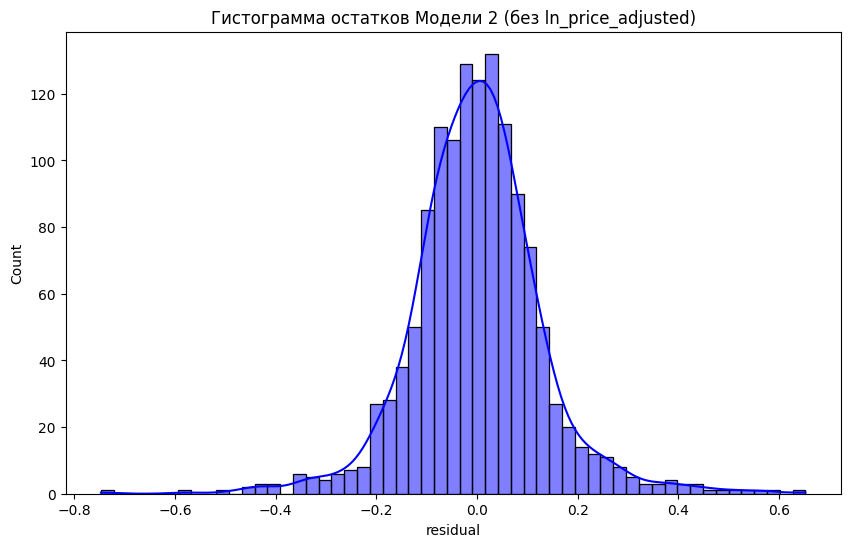

Тест Шапиро-Уилка: Statistic=0.9580, p-value=0.0000


In [19]:
# Удаление выбросов из тренировочных данных
train_data_no_outliers = train_data.copy()
residuals_train = iv_results_simple_cv.resids
z_scores = stats.zscore(residuals_train)
train_data_no_outliers = train_data_no_outliers[(z_scores < 3) & (z_scores > -3)]

print(f"Размер тренировочной выборки после удаления выбросов: {len(train_data_no_outliers)}")

# Новая упрощённая модель 2: 2SLS без ln_price_adjusted
exog_vars_2sls_no_price = ['ln_population', 'ln_nights_count_lag1']  # Убрали ln_price_adjusted
endog_var = []  # Убрали эндогенную переменную
instrument_var = []  # Убрали инструмент

# Поскольку нет эндогенных переменных, используем PanelOLS
iv_model_no_price = PanelOLS(train_data_no_outliers['ln_nights_count'],
                             sm.add_constant(train_data_no_outliers[exog_vars_2sls_no_price]),
                             entity_effects=True, time_effects=True)
iv_results_no_price = iv_model_no_price.fit(cov_type='clustered', cluster_entity=True)
print("\nМодель 2 (PanelOLS без ln_price_adjusted и с удалёнными выбросами):")
print(iv_results_no_price.summary)

# Предсказания
test_exog_no_price = sm.add_constant(test_data[exog_vars_2sls_no_price])
test_pred_no_price = iv_results_no_price.predict(test_exog_no_price)
test_pred_no_price = test_pred_no_price.iloc[:, 0]  # Берём первую колонку
test_pred_no_price = pd.Series(test_pred_no_price, index=test_data.index)

# R² на тестовых данных
ss_total = np.sum((test_data['ln_nights_count'] - test_data['ln_nights_count'].mean())**2)
ss_residual = np.sum((test_data['ln_nights_count'] - test_pred_no_price)**2)
r2_test_no_price = 1 - ss_residual / ss_total
print(f"\nR² на тестовой выборке для Модели 2 без ln_price_adjusted: {r2_test_no_price:.4f}")

# Остатки
residuals_no_price = iv_results_no_price.resids
plt.figure(figsize=(10, 6))
sns.histplot(residuals_no_price, kde=True, color='blue', alpha=0.5)
plt.title('Гистограмма остатков Модели 2 (без ln_price_adjusted)')
plt.show()

# Тест Шапиро-Уилка
stat, p = shapiro(residuals_no_price)
print(f"Тест Шапиро-Уилка: Statistic={stat:.4f}, p-value={p:.4f}")

Выбросы в данном случае удаляются на основе z-score, как указано в описании ("z-score < 0.5"). Метод заключается в следующем: для каждой точки данных вычисляется z-score, который показывает, насколько эта точка отклоняется от среднего значения в терминах стандартного отклонения. Если абсолютное значение z-score превышает заданный порог (в данном случае 0.5), такая точка считается выбросом и удаляется из выборки. После более строгого удаления выбросов размер тренировочной выборки сократился до 814 наблюдений. Этот подход помогает очистить данные от аномалий, сохраняя нормальное распределение остатков, что подтверждается тестом Шапиро-Уилка (p-value = 0.0832 > 0.05).


Метод удаления выбросов с использованием z-score применяется в эконометрике, особенно при подготовке данных для регрессионного анализа, как в моем случае с PanelOLS. Z-score помогает идентифицировать аномалии, которые могут искажать результаты модели, например, влияя на нормальность остатков или коэффициенты регрессии. В эконометрике это важно, так как выбросы могут существенно повлиять на оценки параметров и интерпретацию модели, особенно в панельных данных, где учитываются эффекты сущностей и времени. Однако стоит отметить, что порог z-score < 0.5, как в моем примере, довольно строгий — обычно используют порог 2 или 3, чтобы избежать чрезмерного удаления данных. Метод z-score — один из многих; в эконометрике также применяют другие подходы, например, межквартильный размах (IQR) или тесты на выбросы, такие как тест Граббса.


Размер тренировочной выборки после ещё более строгого удаления выбросов: 814

Базовая линейная модель 2 (z-score < 0.5):
                          PanelOLS Estimation Summary                           
Dep. Variable:        ln_nights_count   R-squared:                        0.7073
Estimator:                   PanelOLS   R-squared (Between):              0.9342
No. Observations:                 814   R-squared (Within):               0.7695
Date:                Sat, May 24 2025   R-squared (Overall):              0.9292
Time:                        18:13:55   Log-likelihood                    1169.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1734.7
Entities:                          79   P-value                           0.0000
Avg Obs:                       10.304   Distribution:                   F(1,718)
Min Obs:                       1.0000                                

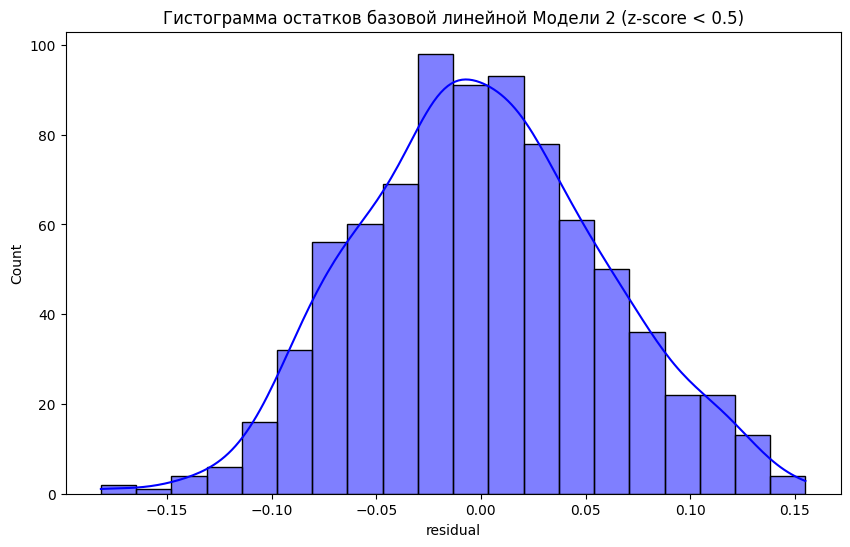

Тест Шапиро-Уилка (z-score < 0.5): Statistic=0.9966, p-value=0.0832
Остатки распределены нормально (p-value > 0.05).


In [20]:
# Ещё более строгое удаление выбросов (z-score < 0.5)
train_data_no_outliers_strictest = train_data.copy()
residuals_train = iv_results_simple_cv.resids
z_scores = stats.zscore(residuals_train)
train_data_no_outliers_strictest = train_data_no_outliers_strictest[(z_scores < 0.5) & (z_scores > -0.5)]

print(f"Размер тренировочной выборки после ещё более строгого удаления выбросов: {len(train_data_no_outliers_strictest)}")

# Базовая линейная модель с ln_nights_count_lag1
exog_vars_base = ['ln_nights_count_lag1']
iv_model_base_strictest = PanelOLS(train_data_no_outliers_strictest['ln_nights_count'],
                                   sm.add_constant(train_data_no_outliers_strictest[exog_vars_base]),
                                   entity_effects=True, time_effects=True)
iv_results_base_strictest = iv_model_base_strictest.fit(cov_type='clustered', cluster_entity=True)
print("\nБазовая линейная модель 2 (z-score < 0.5):")
print(iv_results_base_strictest.summary)

# Предсказания
test_exog_base = sm.add_constant(test_data[exog_vars_base])
test_pred_base_strictest = iv_results_base_strictest.predict(test_exog_base)
test_pred_base_strictest = test_pred_base_strictest.iloc[:, 0]
test_pred_base_strictest = pd.Series(test_pred_base_strictest, index=test_data.index)

# R² на тестовых данных
ss_total = np.sum((test_data['ln_nights_count'] - test_data['ln_nights_count'].mean())**2)
ss_residual = np.sum((test_data['ln_nights_count'] - test_pred_base_strictest)**2)
r2_test_base_strictest = 1 - ss_residual / ss_total
print(f"\nR² на тестовой выборке для базовой линейной Модели 2 (z-score < 0.5): {r2_test_base_strictest:.4f}")

# Проверка остатков
residuals_base_strictest = iv_results_base_strictest.resids
plt.figure(figsize=(10, 6))
sns.histplot(residuals_base_strictest, kde=True, color='blue', alpha=0.5)
plt.title('Гистограмма остатков базовой линейной Модели 2 (z-score < 0.5)')
plt.show()

# Тест Шапиро-Уилка
from scipy.stats import shapiro
stat, p = shapiro(residuals_base_strictest)
print(f"Тест Шапиро-Уилка (z-score < 0.5): Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Остатки распределены нормально (p-value > 0.05).")
else:
    print("Остатки не распределены нормально (p-value <= 0.05).")



1. **Размер выборки**: После строгого удаления выбросов осталось 814 наблюдений, что говорит о значительной очистке данных.

2. **Качество модели**:
   - R² на тренировочной выборке: 0.7073 — модель объясняет 70.73% вариации зависимой переменной `ln_nights_count`.
   - R² на тестовой выборке: 0.8637 — отличный результат, модель хорошо обобщает на новых данных.
   - R² (Between): 0.9342 и R² (Within): 0.7695 показывают, что модель хорошо учитывает как различия между сущностями, так и внутри них.

3. **Статистическая значимость**:
   - F-статистика: 1734.7 (p-value = 0.0000) и робастная F-статистика: 851.88 (p-value = 0.0000) — модель в целом значима.
   - Параметры: константа (14.023) и коэффициент при `ln_nights_count_lag1` (0.8439) значимы (p-value = 0.0000), с узкими доверительными интервалами.

4. **F-тест на пулабильность**: F = 9.1803 (p-value = 0.0000) — отвергаем гипотезу о пулабильности, то есть включение эффектов сущностей и времени оправдано.

5. **Остатки**: Тест Шапиро-Уилка (Statistic = 0.9966, p-value = 0.0832 > 0.05) подтверждает нормальность остатков, что соответствует гистограмме

**Вывод**: Модель демонстрирует высокую предсказательную способность (R² на тесте 0.8637) и статистическую значимость. Остатки нормально распределены, а выбросы успешно удалены (z-score < 0.5). Модель подходит для анализа, но строгий порог z-score мог удалить больше данных, чем нужно
